<a href="https://colab.research.google.com/github/ahmed87651/Master-Thesis-Code/blob/main/Image_Classifcation_ResNet50_With_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



# Install fastai dependencies

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision import *

# Upload Custom Classification Dataset

In [ ]:
! unzip /content/gdrive/MyDrive/Bike.and.Ebike.v5i.clip.zip

Archive:  /content/gdrive/MyDrive/Bike.and.Ebike.v5i.clip.zip
   creating: Bike.and.Ebike.v5i.clip/
  inflating: Bike.and.Ebike.v5i.clip/README.dataset.txt  
  inflating: Bike.and.Ebike.v5i.clip/README.roboflow.txt  
   creating: Bike.and.Ebike.v5i.clip/test/
   creating: Bike.and.Ebike.v5i.clip/test/bike/
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10400_jpg.rf.c5ff5c86837cebbe80189f4feb2a91b7.jpg  
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10402_jpg.rf.6ffc2865214572630cf976ae19c14602.jpg  
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10413_jpg.rf.20695a8e778dc7e67110a1132524b9ba.jpg  
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10593_jpg.rf.f2131c3f5428d8ebc4795fa47184ff8d.jpg  
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10598_jpg.rf.1e36eaaca95a283c4837bd12896bbd22.jpg  
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10602_jpg.rf.10c64da558874390cc053ad341c0b5d3.jpg  
  inflating: Bike.and.Ebike.v5i.clip/test/bike/1_frame10

In [ ]:
import numpy as np


In [ ]:
#build fastai dataset loader
np.random.seed(42)
#fastai automatically factors the ./train and ./valid folders into seperate datasets
#more details https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_folder
path = Path("/content/Bike.and.Ebike.v5i.clip")
data = ImageDataBunch.from_folder(path, size=200, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#double check the data classes
data.classes

['bike', 'ebike']

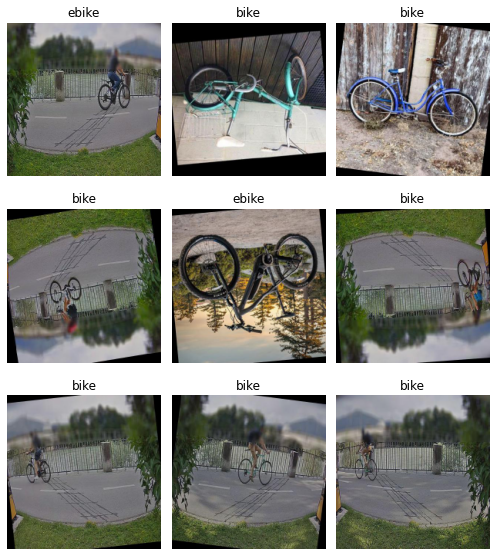

In [ ]:
#take a peak at the batch to make sure things were loaded correctly
data.show_batch(rows=3, figsize=(7, 8))


# Set up fastai Resnet model

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet50, metrics= [error_rate,accuracy,Recall(),Precision(),FBeta()])


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
#print network layers
learn

Learner(data=ImageDataBunch;

Train: LabelList (1510 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
ebike,ebike,ebike,ebike,ebike
Path: /content/Bike.and.Ebike.v5i.clip;

Valid: LabelList (216 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
ebike,ebike,ebike,ebike,ebike
Path: /content/Bike.and.Ebike.v5i.clip;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

# Train Custom Resnet Image Classifier

In [ ]:
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=10)
save_best_model = SaveModelCallback(learn, name='best_resnet50')

In [ ]:
#frozen training step
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(20, callbacks=[early_stop, save_best_model])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 0.3579265773296356.
Better model found at epoch 1 with valid_loss value: 0.3152000606060028.
Better model found at epoch 3 with valid_loss value: 0.25551050901412964.
Better model found at epoch 4 with valid_loss value: 0.13379676640033722.
Better model found at epoch 7 with valid_loss value: 0.09551485627889633.
Epoch 18: early stopping


In [ ]:
#load best model from frozen training
learn.load('best_resnet50')


Learner(data=ImageDataBunch;

Train: LabelList (1510 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
ebike,ebike,ebike,ebike,ebike
Path: /content/Bike.and.Ebike.v5i.clip;

Valid: LabelList (216 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
ebike,ebike,ebike,ebike,ebike
Path: /content/Bike.and.Ebike.v5i.clip;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [ ]:
learn.unfreeze()

In [ ]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)
    
    
    #loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #return the learning rate that produces the minimum loss divide by 10   
    return lrs[min_loss_index] / 10

In [ ]:
optimal_lr = find_appropriate_lr(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.fit_one_cycle(5, max_lr=slice(optimal_lr/10, optimal_lr), callbacks=[early_stop, save_best_model])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 0.0946340411901474.


In [ ]:
learn.load('best_resnet50')


Learner(data=ImageDataBunch;

Train: LabelList (1510 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
ebike,ebike,ebike,ebike,ebike
Path: /content/Bike.and.Ebike.v5i.clip;

Valid: LabelList (216 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
ebike,ebike,ebike,ebike,ebike
Path: /content/Bike.and.Ebike.v5i.clip;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

# Evaluate Classifier Performance

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


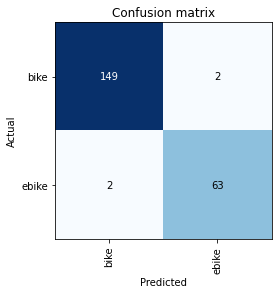

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


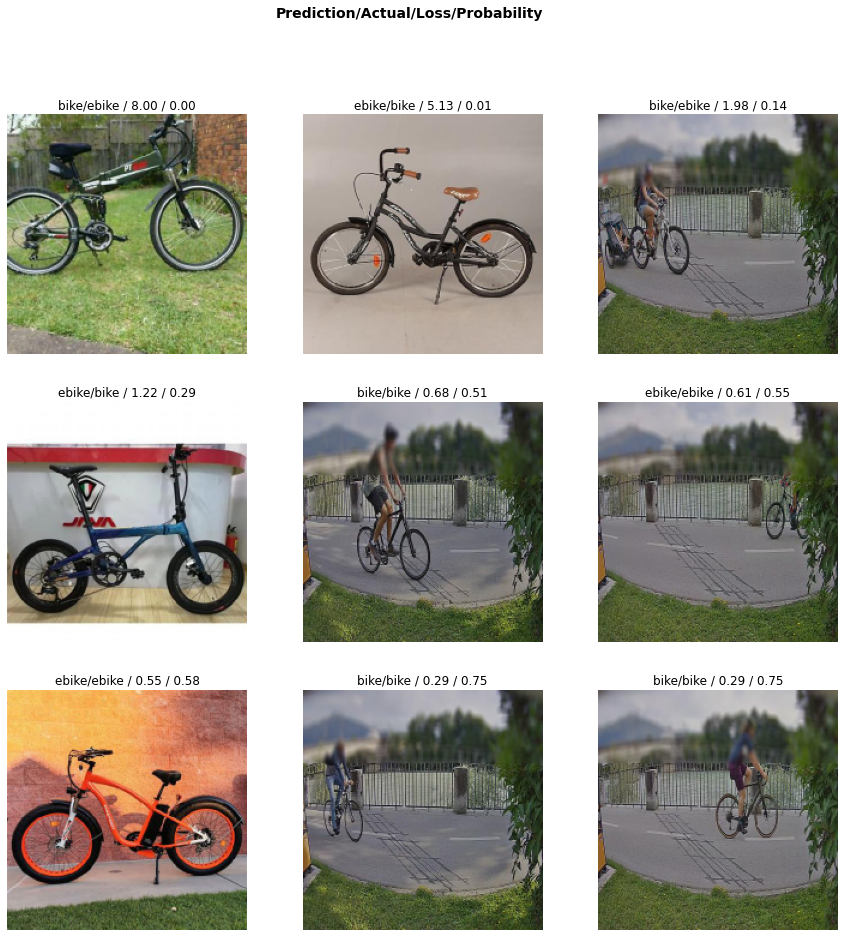

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))


/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame26901_jpg.rf.bff470f8015aaa68a69870480c419ba7.jpg
bike


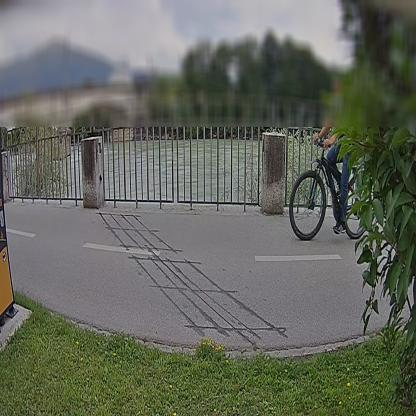



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame35139_jpg.rf.d70c6179d5b0632b404b412016d3e69b.jpg
ebike


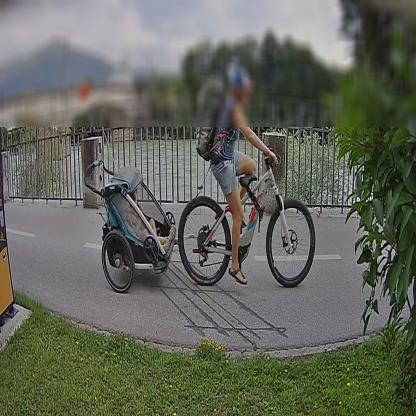



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame31921_jpg.rf.cf0a042d3d0f1a162188322573d13b0a.jpg
ebike


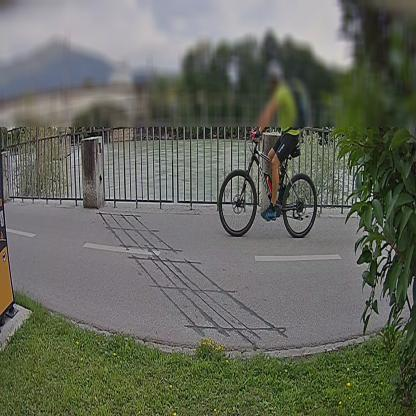



/content/Bike.and.Ebike.v5i.clip/test/ebike/1_frame9392_jpg.rf.cda1a584d674fae2669a192e12cf092a.jpg
ebike


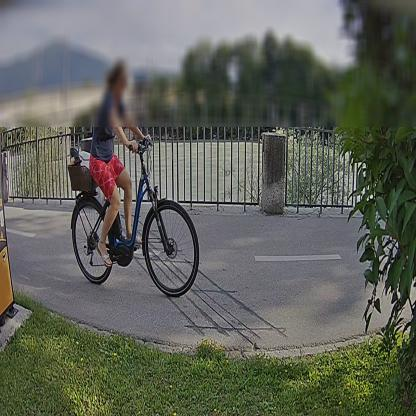



/content/Bike.and.Ebike.v5i.clip/test/ebike/201_1b17891a_jpg.rf.632cd913e4e85d464e5cd09ea92c0acc.jpg
ebike


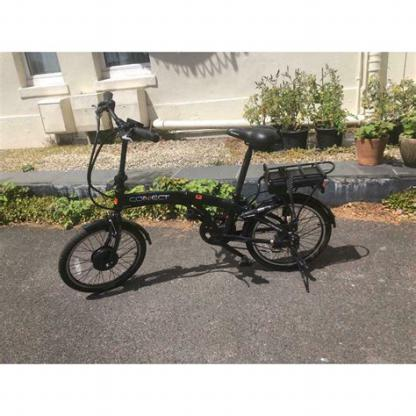



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame15253_jpg.rf.1557c8ca3b6f3d13095dfa9722dcfd03.jpg
ebike


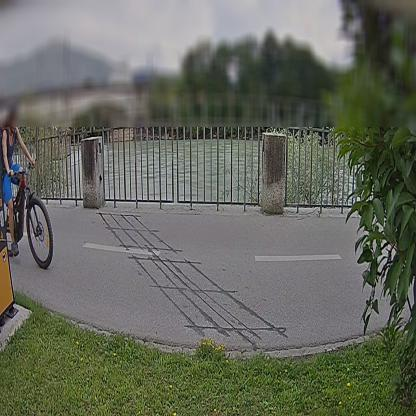



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame15260_jpg.rf.b8294e3865821aa08f9e126dbc689b86.jpg
ebike


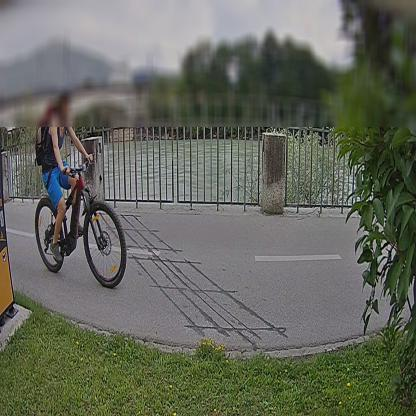



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame24945_jpg.rf.1de93bffb49a5a0cc7986fa43141945e.jpg
ebike


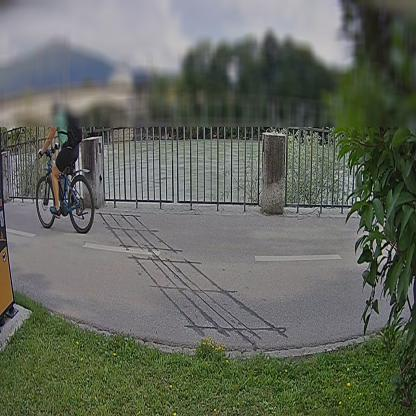



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame12271_jpg.rf.2581048667c2fef3d22ce54e82b7dd70.jpg
ebike


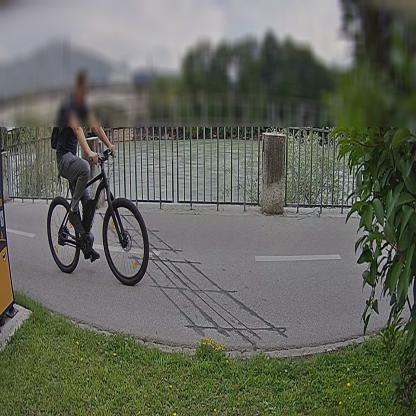



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame12268_jpg.rf.6a074d6351ac92d7c05ac3dd6d582afe.jpg
ebike


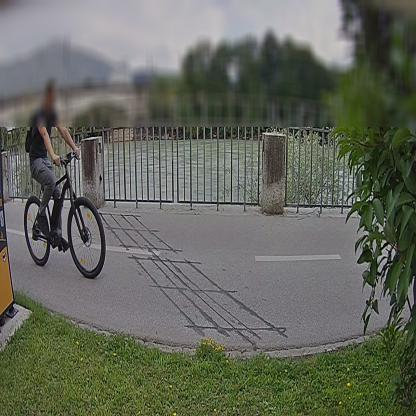



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame15256_jpg.rf.dcc80e288582724dd5c74e9aed3b99a6.jpg
ebike


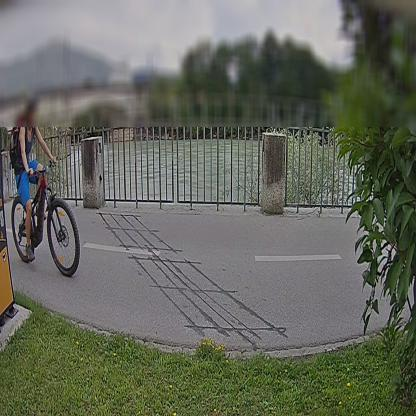



/content/Bike.and.Ebike.v5i.clip/test/ebike/sebastian-bruch-KHZXnCf6HFQ-unsplash_jpg.rf.05295c30bffb43caa48aeae2bd0792b5.jpg
ebike


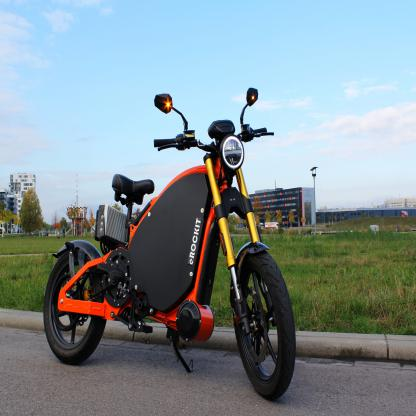



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23315_jpg.rf.3746118c81e43d6f406b092810446b48.jpg
ebike


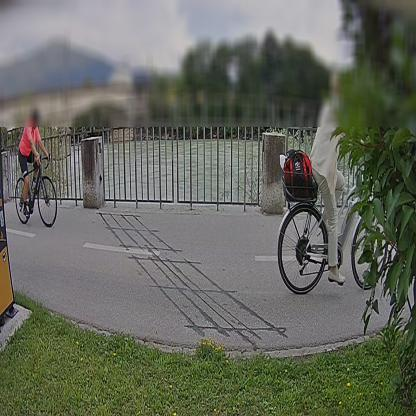



/content/Bike.and.Ebike.v5i.clip/test/ebike/1_frame9385_jpg.rf.54bd7030ea4e59a2339a25f0a99210bc.jpg
bike


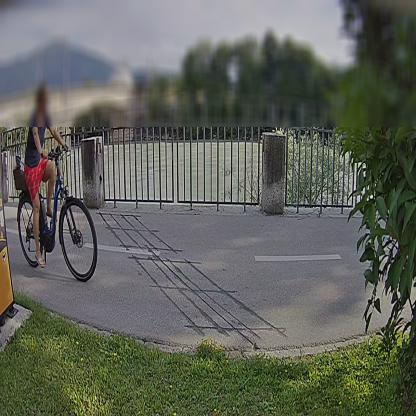



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame12269_jpg.rf.99aff642ae8c8920cf359b3b79d14292.jpg
ebike


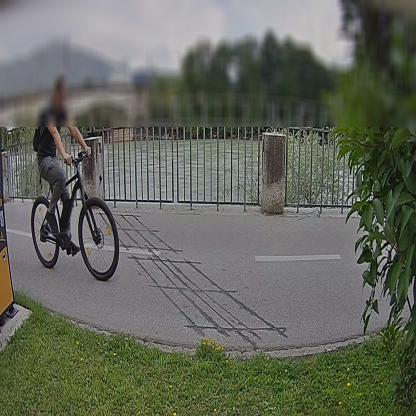



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23299_jpg.rf.2f17bc922ce2ec1f694cdee384fe4224.jpg
ebike


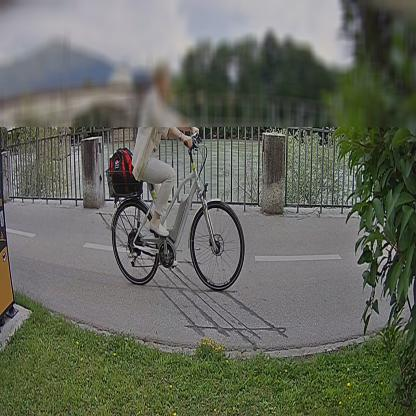



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23290_jpg.rf.9180b5446927b3150ba9f2fee56308f2.jpg
ebike


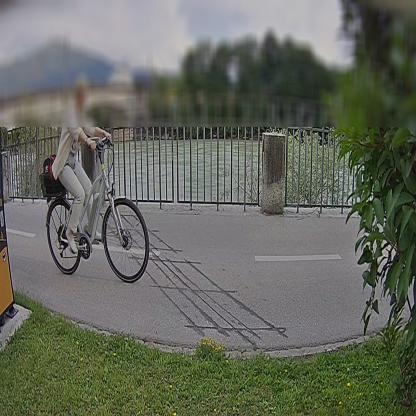



/content/Bike.and.Ebike.v5i.clip/test/ebike/188_be4315cf_jpg.rf.b3a65a1009763f3bcc9f417bedc32fb8.jpg
ebike


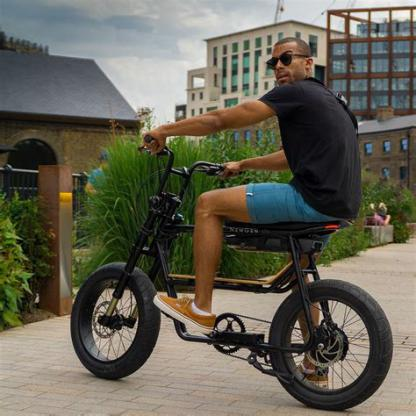



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame24919_jpg.rf.d819c5502a4a0d04f5cec9ef0fe18b2a.jpg
ebike


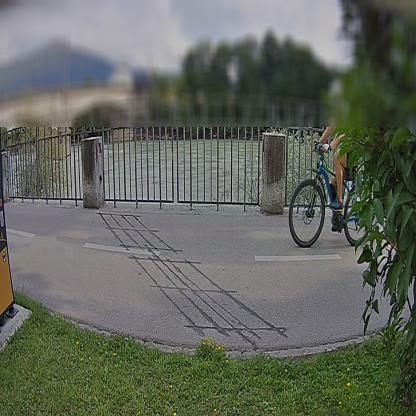



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23291_jpg.rf.649a9a66984bdf679f5a32c3fa34d0e3.jpg
ebike


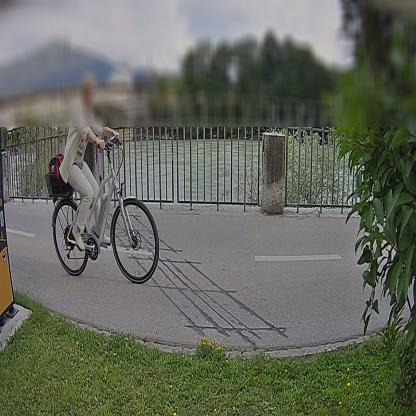



/content/Bike.and.Ebike.v5i.clip/test/ebike/1_frame9402_jpg.rf.09195dc7941fb301372be2dbddfb9505.jpg
ebike


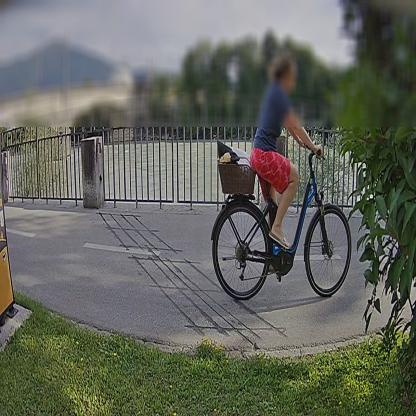



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame24947_jpg.rf.c1108b2640da041ccf830b38ffbd8aad.jpg
ebike


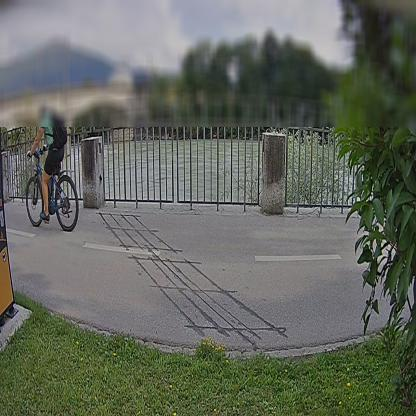



/content/Bike.and.Ebike.v5i.clip/test/ebike/English-Startup-NewGen-Bikes-kicks-off-with-their-345-Electric-Bicycle-_jpg.rf.d7d1c834a634b491ba29131669953306.jpg
ebike


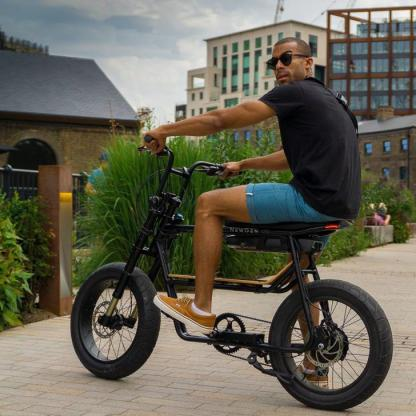



/content/Bike.and.Ebike.v5i.clip/test/ebike/IZIP-E3-Peak--Electric-Bike-Review-Part-1---Pictures---Specs-_-Electric-Bike-Report-_-Electric-Bike--Ebikes--Electric-Bicycles--E-Bike--Reviews_jpg.rf.fafaff586e2735dcee883fbdccd9b7c2.jpg
ebike


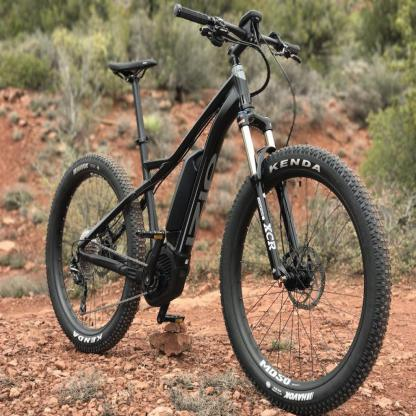



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame35132_jpg.rf.73ad6ccd764be2f6f316783fe57e5a58.jpg
ebike


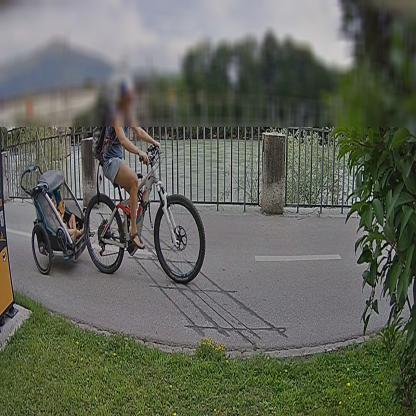



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame15262_jpg.rf.abad748fa869e4bc1f836f7c3b35637e.jpg
ebike


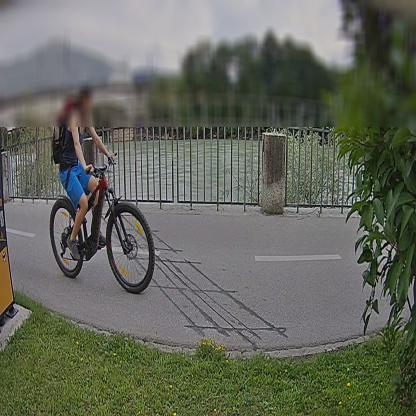



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame15257_jpg.rf.1f2858fcf1a4c21c2428b7f3a6d088a0.jpg
ebike


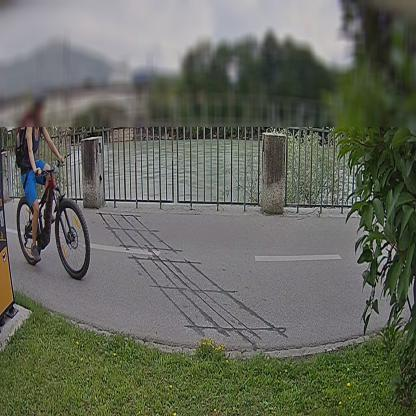



/content/Bike.and.Ebike.v5i.clip/test/ebike/1_frame9396_jpg.rf.cb2fb60b35fee2f9beef05228d834f4f.jpg
ebike


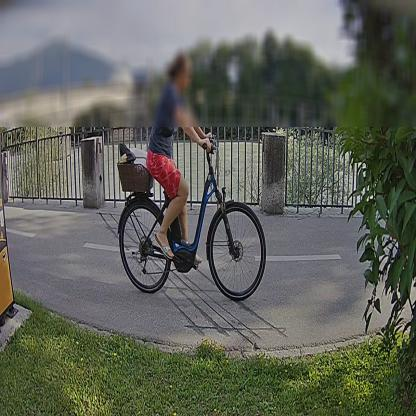



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame24918_jpg.rf.765363d8cacf1be660fa520782dcf21f.jpg
ebike


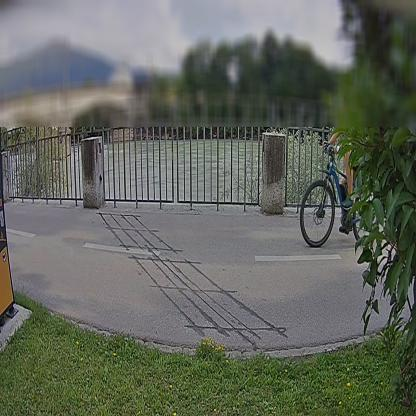



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame31920_jpg.rf.a33d2ad8f79aece52ce8281c0165b04f.jpg
ebike


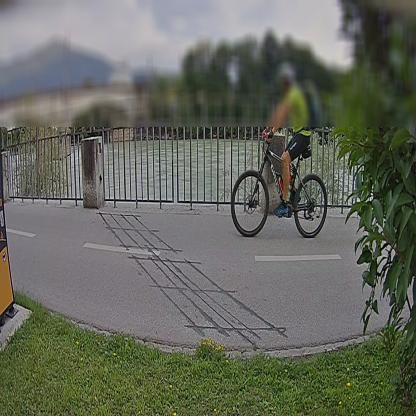



/content/Bike.and.Ebike.v5i.clip/test/ebike/053_9e69c102_jpg.rf.dc6c2b030a9946c15cc67a472bdca7fc.jpg
ebike


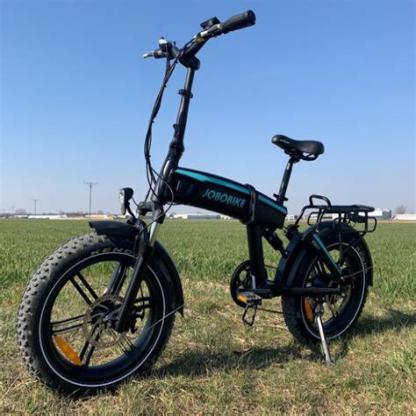



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame31942_jpg.rf.ec9377e5f6ce9f7a628643600967fd30.jpg
ebike


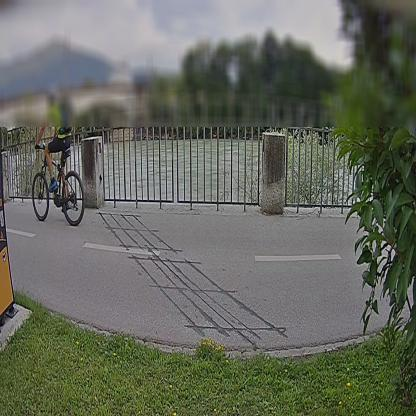



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23314_jpg.rf.c850bfe4715ba5d99a56303823d74684.jpg
ebike


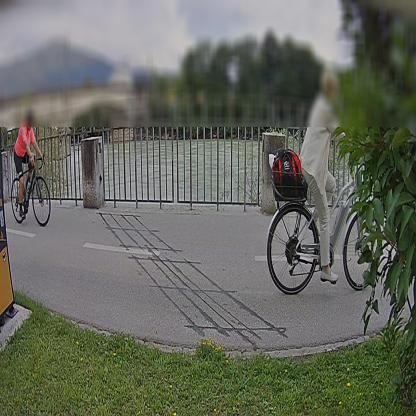



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame12280_jpg.rf.e13e544b2ae0526f96b30bc1d79a0777.jpg
ebike


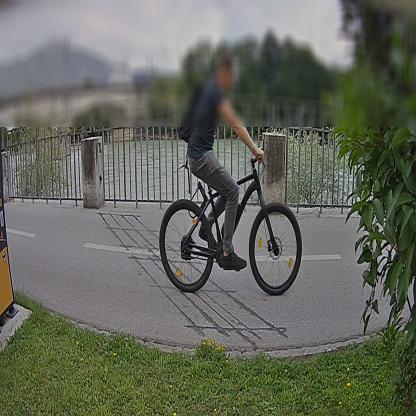



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23287_jpg.rf.554d94f7d3c7febd5b01ef0c73c2efa5.jpg
ebike


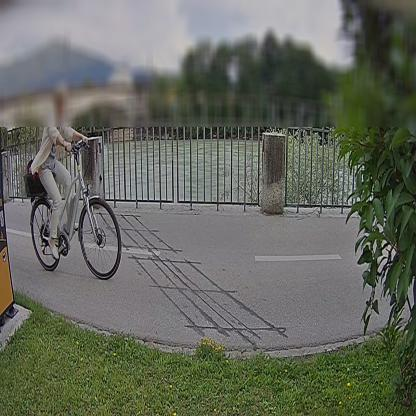



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23310_jpg.rf.7ec84425cd315d267fb89980bfffe11d.jpg
ebike


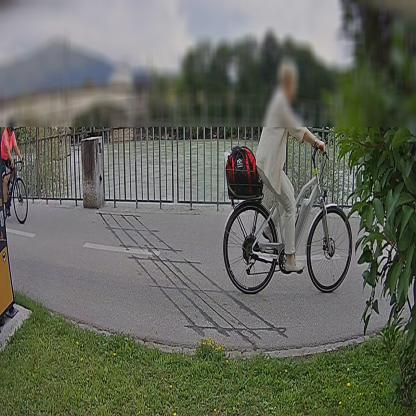



/content/Bike.and.Ebike.v5i.clip/test/ebike/1_frame9383_jpg.rf.18e988d28aec1a14886dafc56200e52c.jpg
ebike


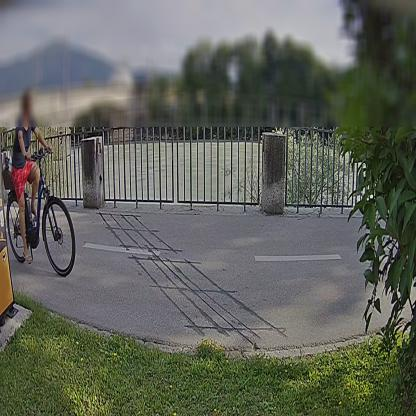



/content/Bike.and.Ebike.v5i.clip/test/ebike/3_frame23306_jpg.rf.6357b766bb931f60ab0b2ab13fe81478.jpg
ebike


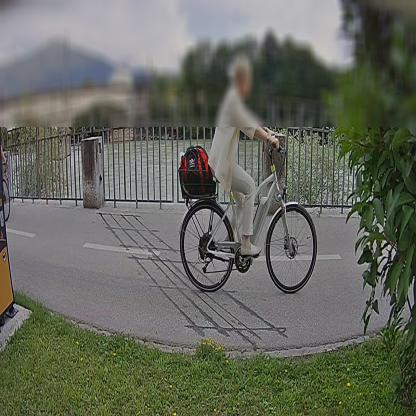



/content/Bike.and.Ebike.v5i.clip/test/ebike/027_d8e9647c_jpg.rf.9394b86aeaa3acc7375afbb4aecb4529.jpg
ebike


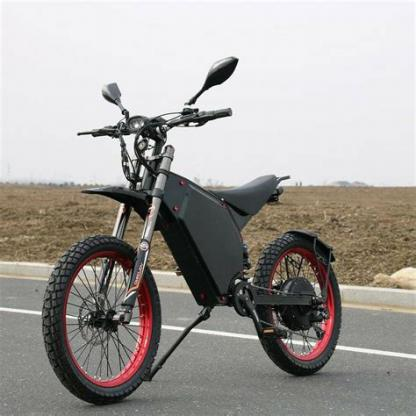



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10593_jpg.rf.f2131c3f5428d8ebc4795fa47184ff8d.jpg
bike


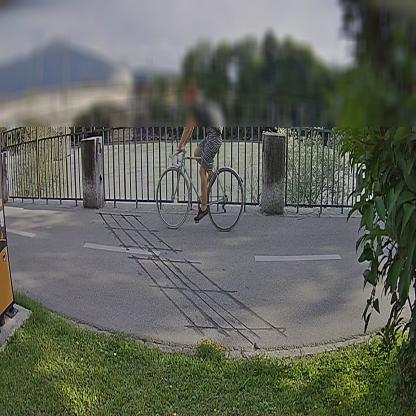



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame2997_jpg.rf.52d7d0593e860bfa5769e4adff0827de.jpg
bike


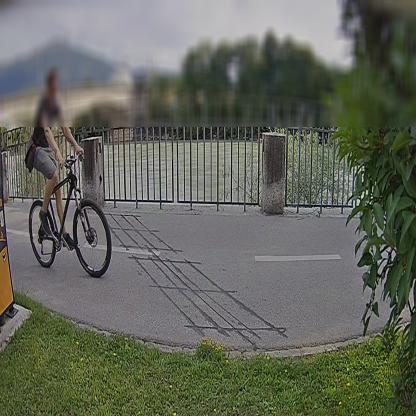



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame9915_jpg.rf.cce8610565aa95edbc9afa90b13d6c2f.jpg
bike


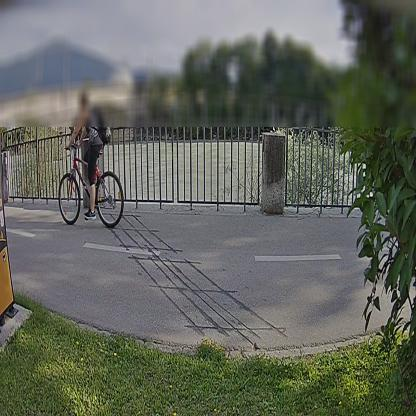



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3082_jpg.rf.98d5d8f2a8236b7f2d489d836cf27c42.jpg
bike


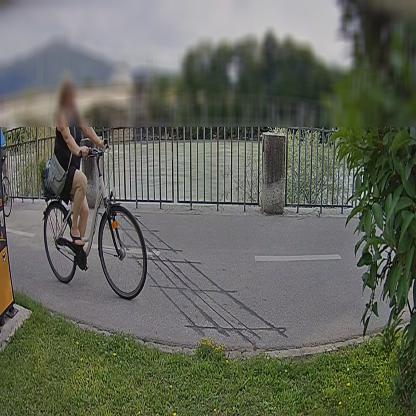



/content/Bike.and.Ebike.v5i.clip/test/bike/275_2a0420b9_jpg.rf.c551003f2bb811c346590f5760977355.jpg
ebike


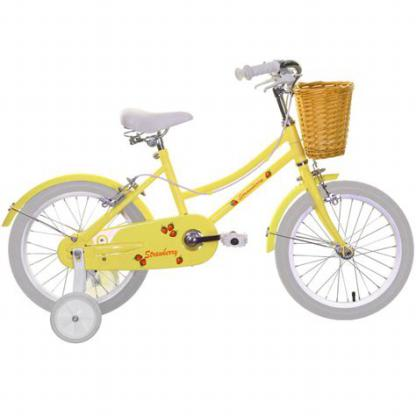



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame688_jpg.rf.69763359c6e8f914e5d879d5b5bcf55d.jpg
bike


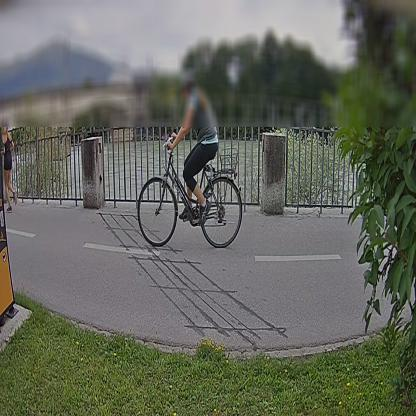



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame13694_jpg.rf.17c6ef142fe846e0ccf4baba87a53eb4.jpg
bike


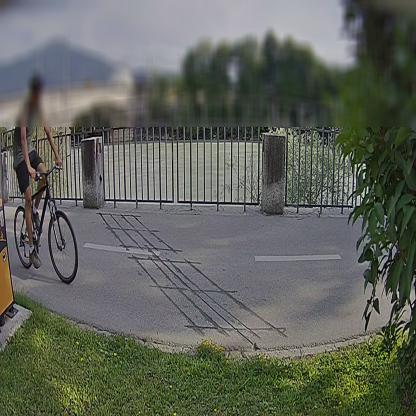



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3012_jpg.rf.f8028dd93dc7adeabd2e17df5cba3028.jpg
bike


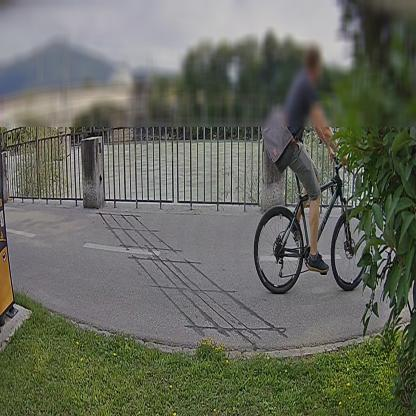



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame9901_jpg.rf.3a05478773688735bfa16ef98f33e8bb.jpg
bike


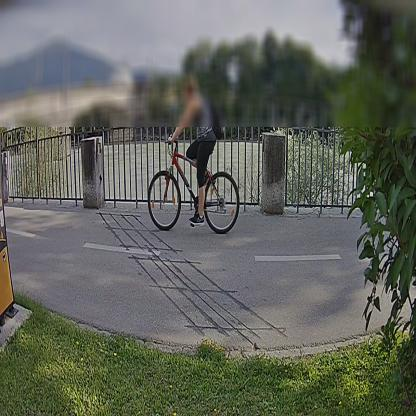



/content/Bike.and.Ebike.v5i.clip/test/bike/252_1367c1d5_jpg.rf.3846741d9ca5f54d33b6acdd61c89688.jpg
bike


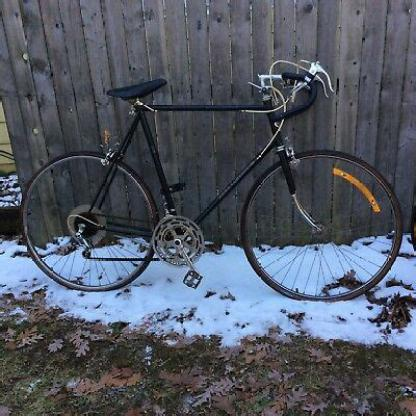



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3256_jpg.rf.c28253b830e9df8d40b8e52a3afec5f5.jpg
bike


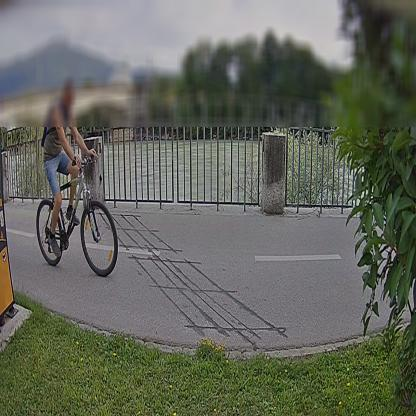



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame17568_jpg.rf.3165d2b5893d79307051ddbffc2aa0b3.jpg
bike


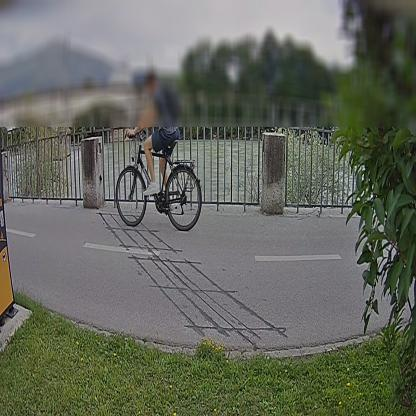



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame697_jpg.rf.83e69645342698734226e993949efe71.jpg
bike


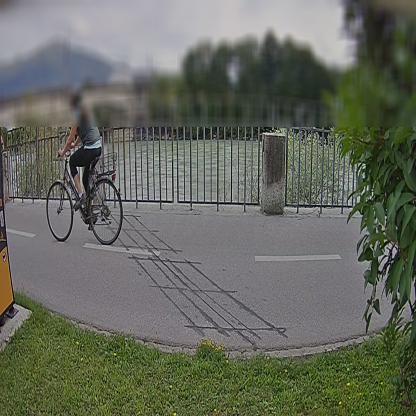



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3587_jpg.rf.b65c1b8e44ba770f3dcae6f9de5a48e9.jpg
bike


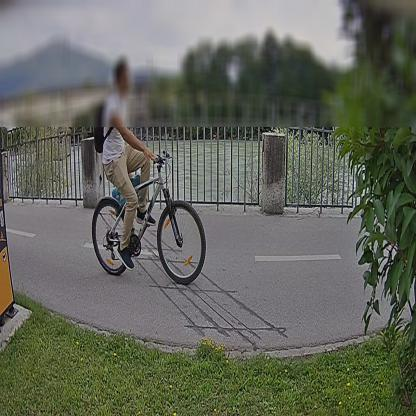



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame1353_jpg.rf.cdf902137b3a9af26a0d2eac1dff2010.jpg
bike


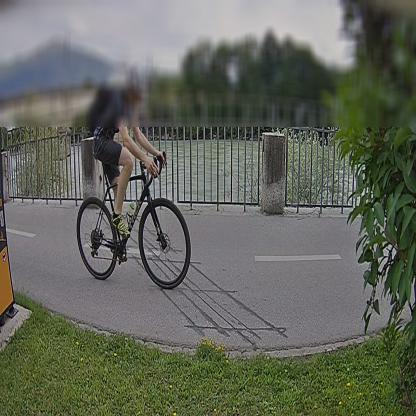



/content/Bike.and.Ebike.v5i.clip/test/bike/286_66dc772d_jpg.rf.174423ac2b60f1fe51164eb3f1f99015.jpg
bike


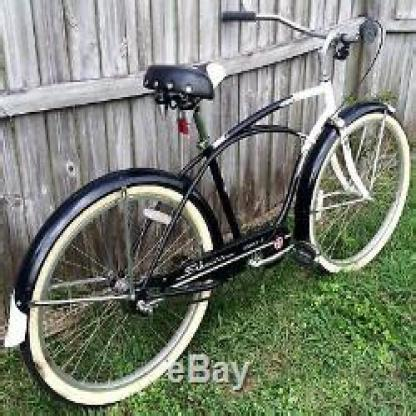



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame13781_jpg.rf.692d79d875e9b64ecfe699da529b1694.jpg
bike


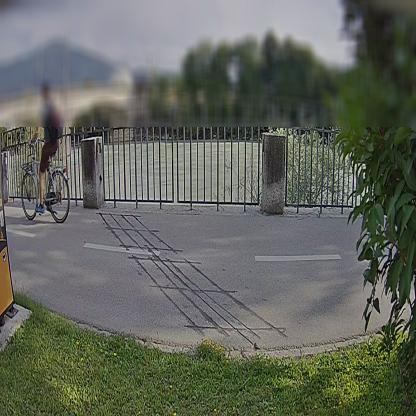



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame17551_jpg.rf.828f1d8970e55fe817aa389b36ed2638.jpg
bike


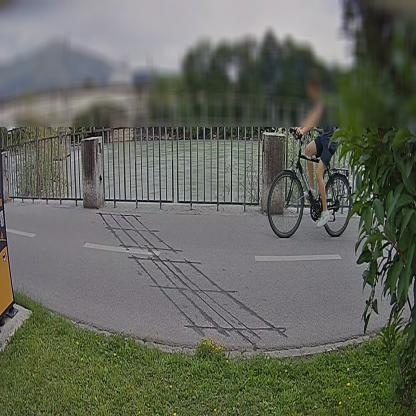



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11198_jpg.rf.5e01d2aeaf838e1e52f75f02e1457444.jpg
bike


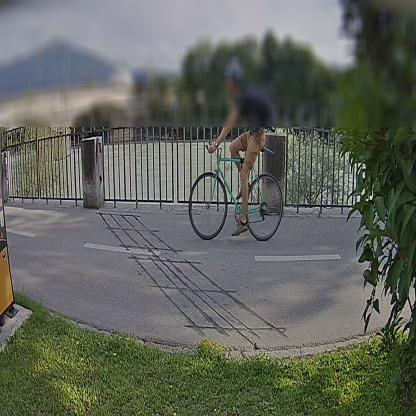



/content/Bike.and.Ebike.v5i.clip/test/bike/276_c9dd8a18_jpg.rf.f70e14980a5e17a03ef663c8a545b746.jpg
bike


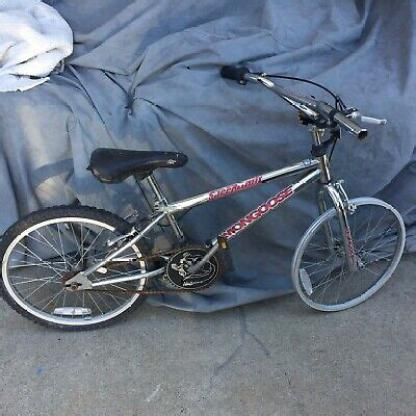



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame17573_jpg.rf.576bd5f8c4ae89f286e6636071f549ec.jpg
bike


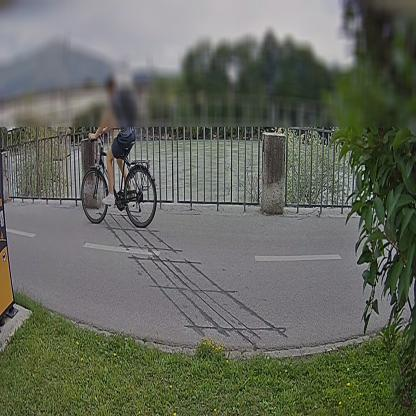



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10879_jpg.rf.d8ef8fd4fe270a28c7a86f4ac9106fb1.jpg
bike


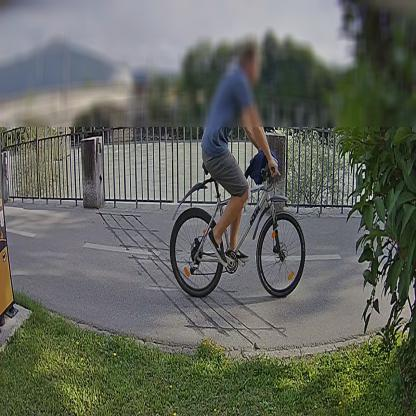



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11105_jpg.rf.13f36708afc7358b36e65eba82027667.jpg
bike


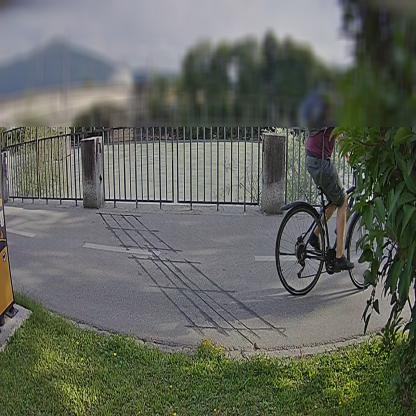



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11910_jpg.rf.3ea89c4d81405c2382e34a4865a5f140.jpg
bike


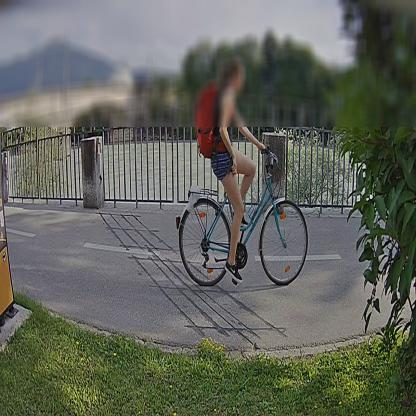



/content/Bike.and.Ebike.v5i.clip/test/bike/298_4eaf910a_jpg.rf.1e0f6e9be4815166c3ca85ded5b307ea.jpg
ebike


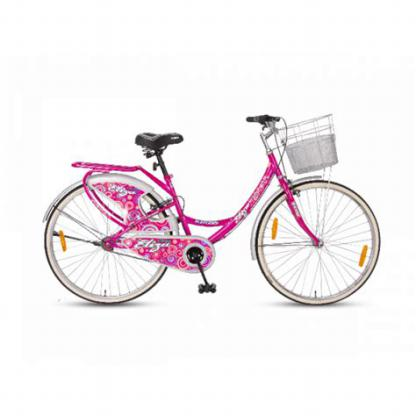



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame1722_jpg.rf.01dbf12e98b9cb9587563568a2ab8608.jpg
bike


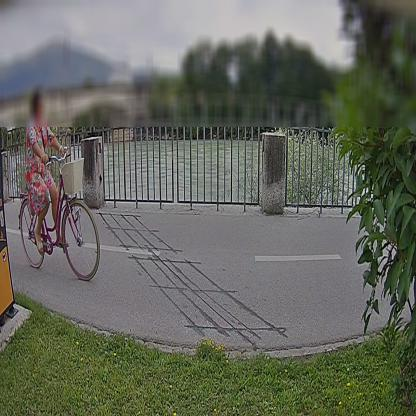



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10860_jpg.rf.250d939c386a81bb2add31358f3334d1.jpg
bike


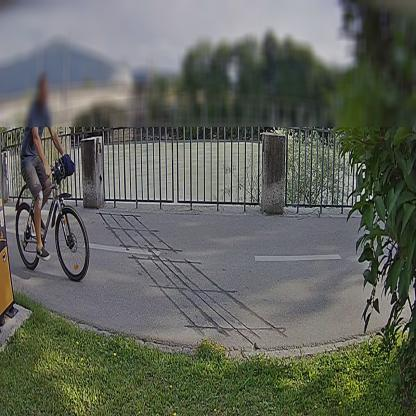



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3266_jpg.rf.28d25812c91891d992c389e7ad6201e2.jpg
bike


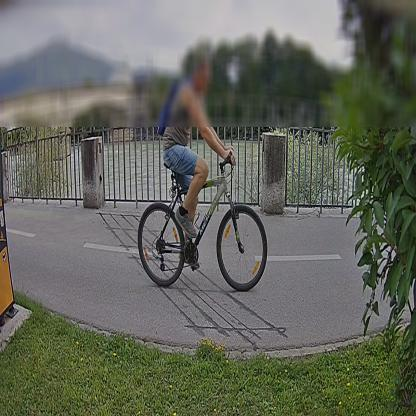



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame2422_jpg.rf.de3988903715992a43e5322d5dd93d81.jpg
bike


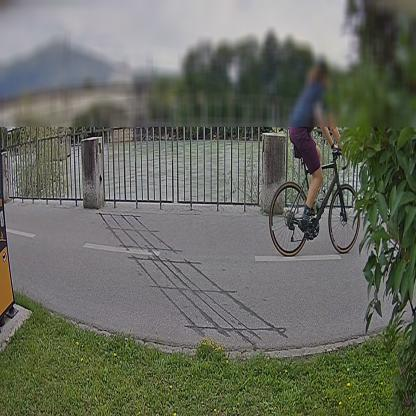



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3262_jpg.rf.8589c0f0559b7d6ce4b05635136ca14a.jpg
bike


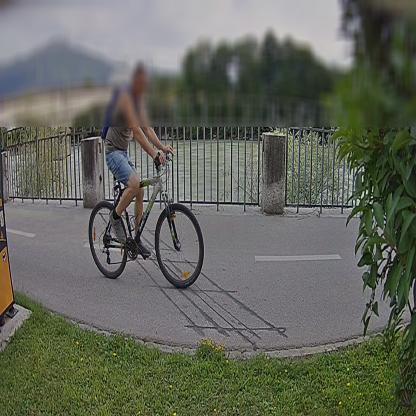



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame1719_jpg.rf.f182dc10937cba421a678ebc5f5dd6d1.jpg
bike


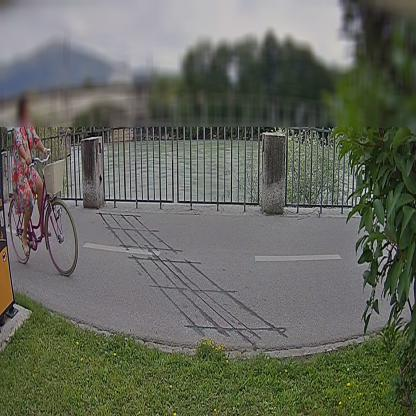



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10402_jpg.rf.6ffc2865214572630cf976ae19c14602.jpg
bike


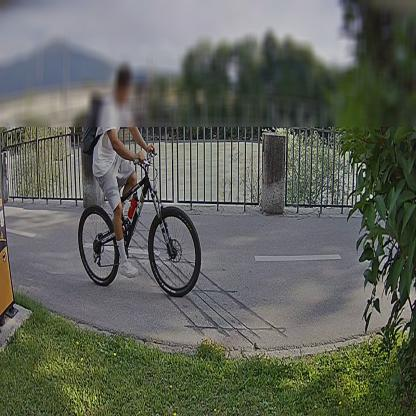



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame1362_jpg.rf.be7be257172834c08cb12a7e409b632c.jpg
bike


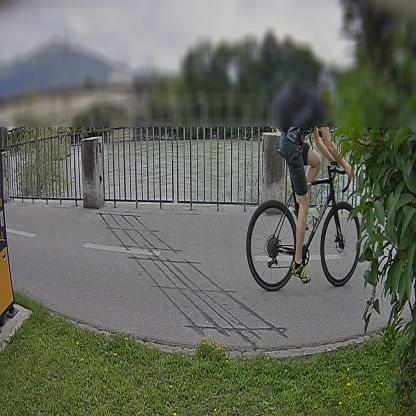



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11199_jpg.rf.4e1c51f0bb32c238d707c332aff2bb6b.jpg
bike


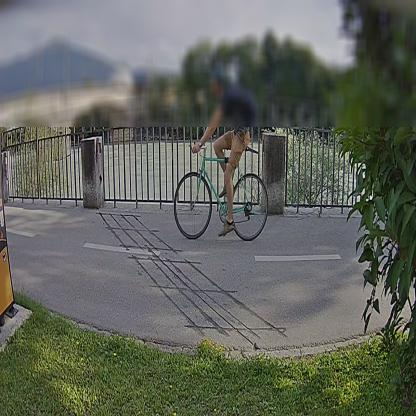



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3093_jpg.rf.fbda0cfade02342d3d38e73fa0040cd1.jpg
bike


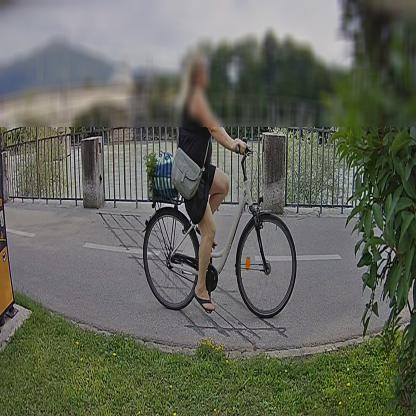



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11196_jpg.rf.3020628044bd0a451a9fe09530f89850.jpg
bike


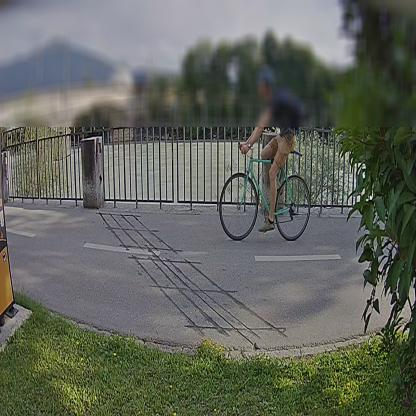



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3585_jpg.rf.bfd202094e6d249a8876eff9b5192c5d.jpg
bike


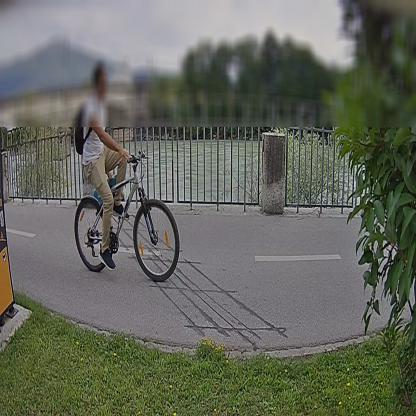



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10413_jpg.rf.20695a8e778dc7e67110a1132524b9ba.jpg
bike


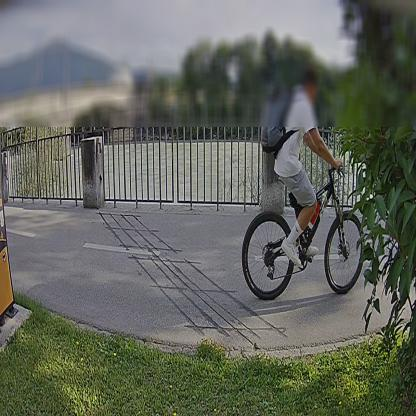



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame6680_jpg.rf.5faee5d247eb25a0d20d8595276a5c89.jpg
bike


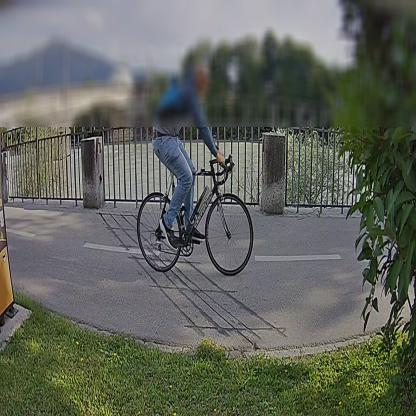



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame17335_jpg.rf.3c8faf524e28761f52c5528d4d7f5cbf.jpg
bike


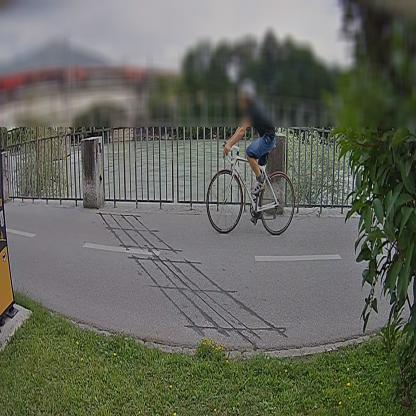



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3669_jpg.rf.83186ed614b3bfaf35e13a9020dad8ca.jpg
bike


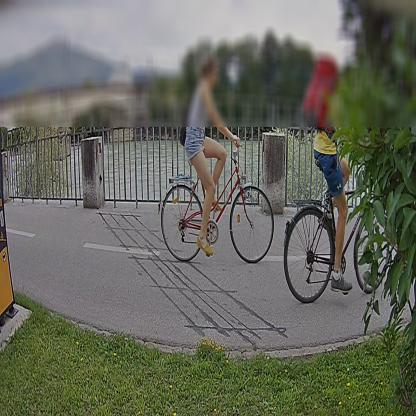



/content/Bike.and.Ebike.v5i.clip/test/bike/295_93978d1b_jpg.rf.ea953040a6ad8bacf7842cdb4265dc70.jpg
bike


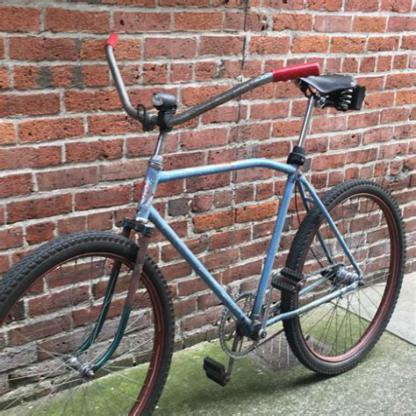



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11206_jpg.rf.c213fc674ceace366ca1e1951cabdcd2.jpg
bike


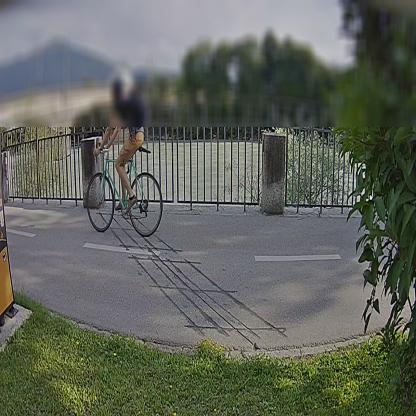



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11209_jpg.rf.a03348d657c88b526373e7861e4f68ce.jpg
bike


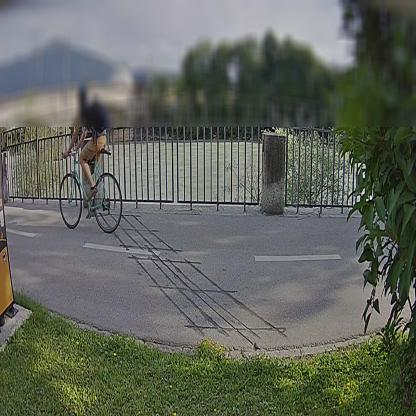



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3075_jpg.rf.7275929bd09531b4aac36e5accd154d5.jpg
bike


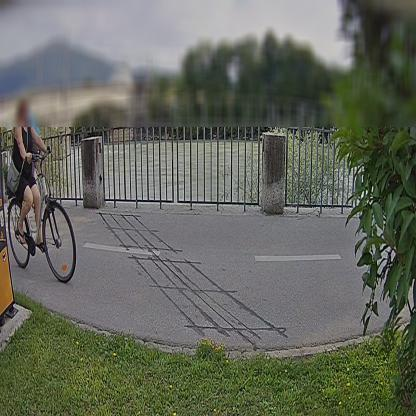



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame5541_jpg.rf.ffbc26844d9bc800ca90e28340be219e.jpg
bike


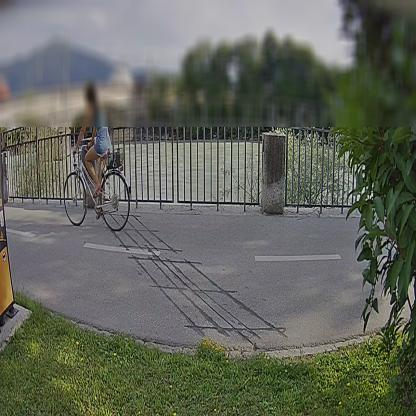



/content/Bike.and.Ebike.v5i.clip/test/bike/287_715511df_jpg.rf.5c755670b45cda7ef1fb5a91fe5d80ea.jpg
bike


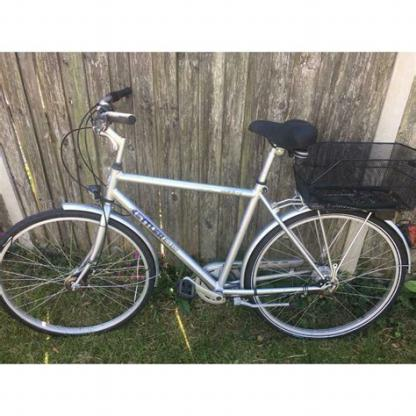



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame13713_jpg.rf.9ac4e496779309f40223dbc3e117d881.jpg
bike


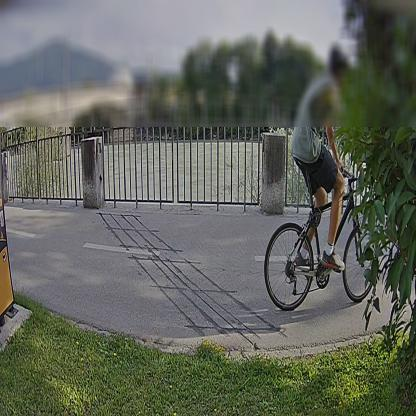



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame686_jpg.rf.176edcae5bf351e82bfa24030201ba22.jpg
bike


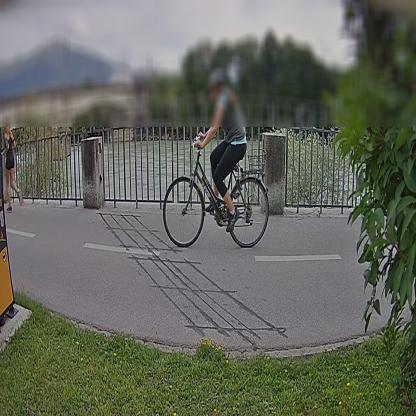



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10877_jpg.rf.2a76ae264f9813b8dad80c90b872547e.jpg
bike


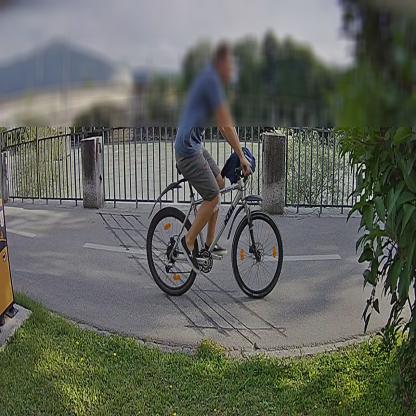



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10602_jpg.rf.10c64da558874390cc053ad341c0b5d3.jpg
bike


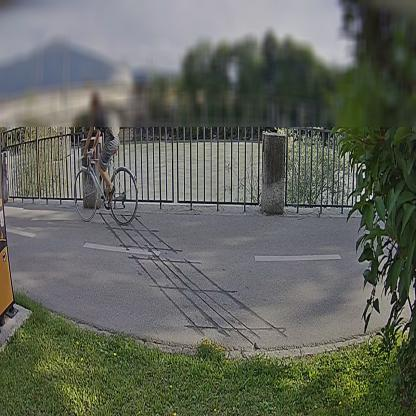



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame1729_jpg.rf.fdb3b015296a4781de7897e7d531fb50.jpg
bike


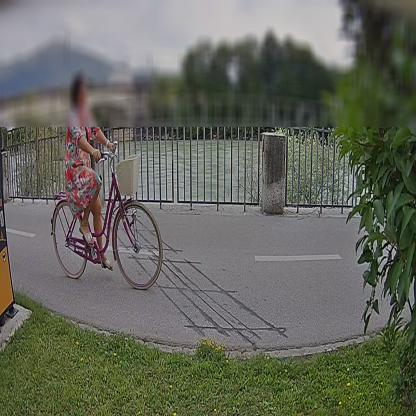



/content/Bike.and.Ebike.v5i.clip/test/bike/272_78a5adca_jpg.rf.0f7341d6fa2a189a5f6624cbbfef4c46.jpg
ebike


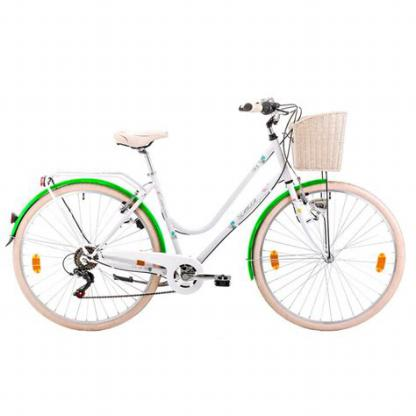



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame9908_jpg.rf.c819692ca3a66644769e4f7d9eb7dd26.jpg
bike


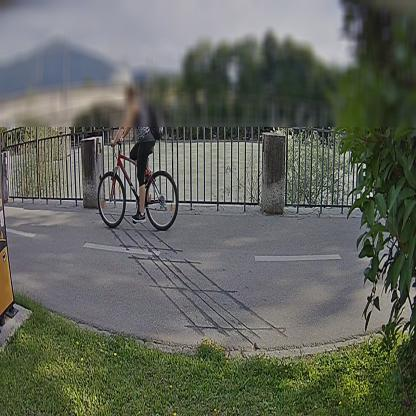



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3096_jpg.rf.0b3a05cb79a290953dde4a71ff4cfa17.jpg
bike


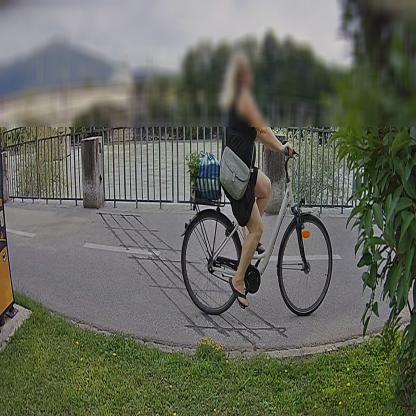



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame13710_jpg.rf.77f7a668469267f1135049b9020d994c.jpg
bike


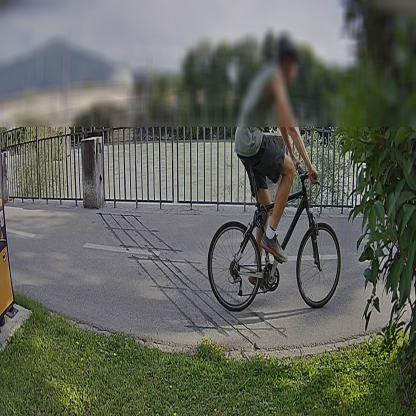



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10886_jpg.rf.2b87afbfb4c5567928eaa420292524a3.jpg
bike


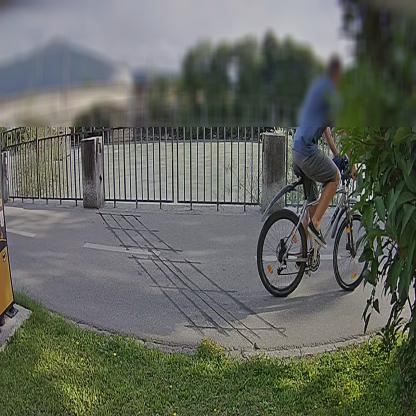



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame5526_jpg.rf.de83b1dfcca074e2d73690b14366b4e2.jpg
bike


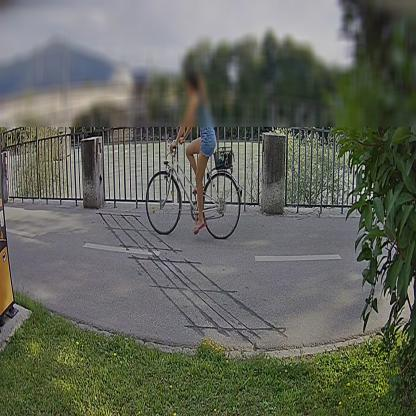



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame3076_jpg.rf.ec5da492bd52841852b900d1f4baa4e7.jpg
bike


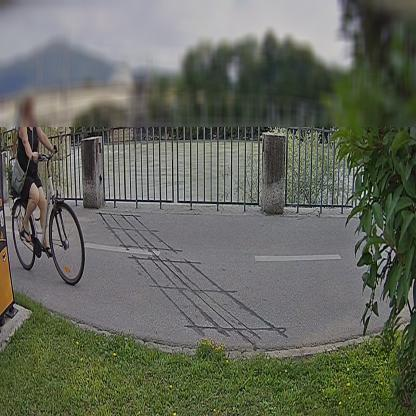



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10400_jpg.rf.c5ff5c86837cebbe80189f4feb2a91b7.jpg
bike


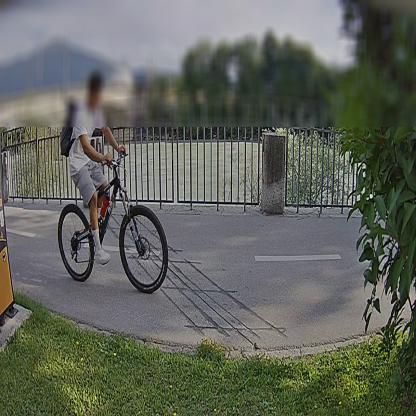



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10598_jpg.rf.1e36eaaca95a283c4837bd12896bbd22.jpg
bike


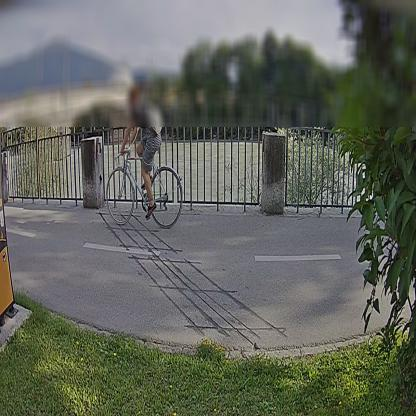



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10878_jpg.rf.a1f52e7a120eba3fa1dfdad28bc3d09c.jpg
ebike


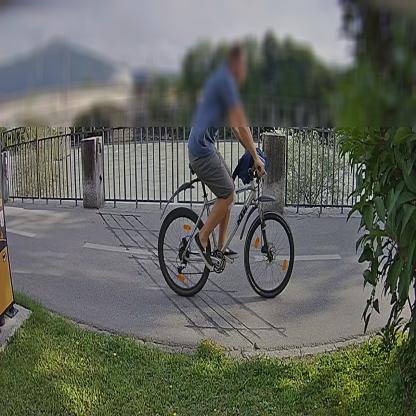



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10889_jpg.rf.9c78a5192be6b627231d870af2831ff9.jpg
bike


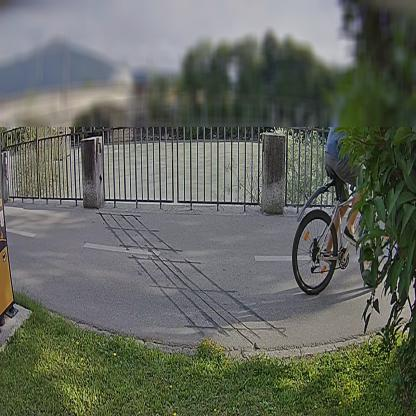



/content/Bike.and.Ebike.v5i.clip/test/bike/255_3c5de548_jpg.rf.89712943b22fc977aa4850f8896bbed7.jpg
bike


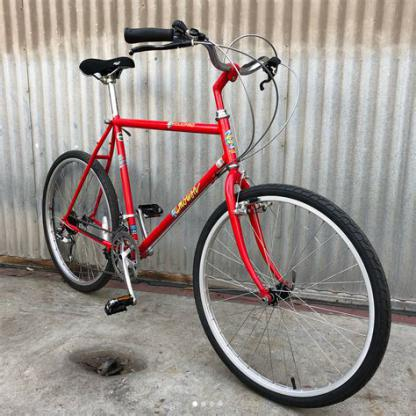



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame10857_jpg.rf.c6e1dc71d0c6086307d0642110ca7656.jpg
bike


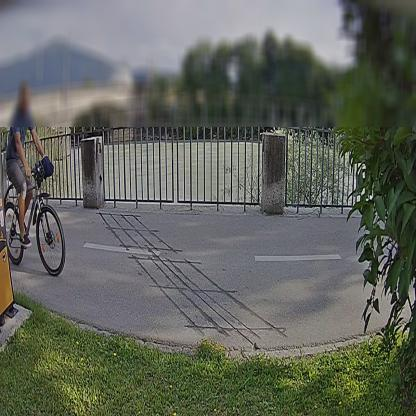



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame1733_jpg.rf.4f7869d6b2192fe1509599bbb0cd4b0c.jpg
bike


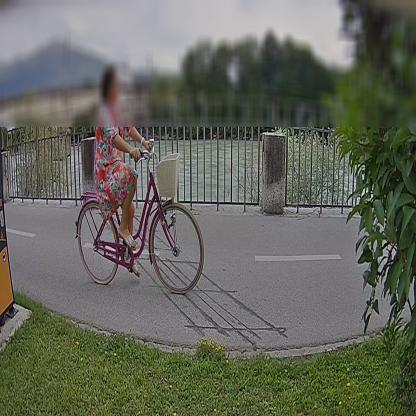



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame11906_jpg.rf.d1c4cb8afda1714440cac5c9a65fa064.jpg
bike


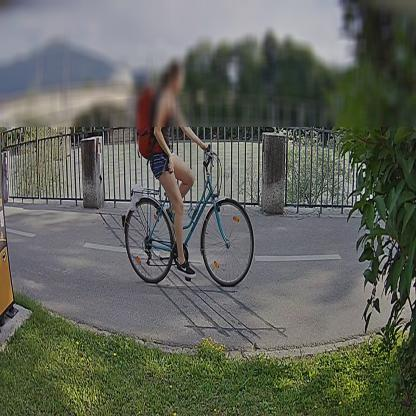



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame6676_jpg.rf.fed8ed8aea92def70bf4b1662a22788b.jpg
bike


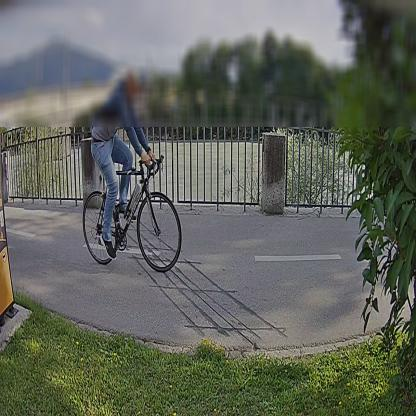



/content/Bike.and.Ebike.v5i.clip/test/bike/1_frame13783_jpg.rf.1216d975f13f1e878524838e05cd5550.jpg
bike


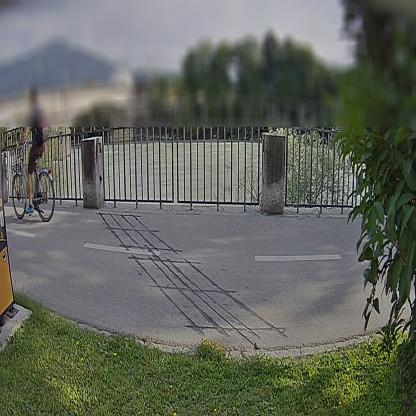

In [ ]:
#run inference on test images
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()
for imageName in glob.glob('/content/Bike.and.Ebike.v5i.clip/test/*/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    #print(prediction)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

# Save custom classification model for future use

In [ ]:
#model is automatically saved with the "save_best_model" callback
%ls "/content/Bike.and.Ebike.v5i.clip/models"

best_resnet50.pth  tmp.pth


In [ ]:
learn.lr_find(stop_div=False, num_it=7)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
